# linA Growth Rates

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read

### `athena_read` Example
Suppose one wants to read the conserved quantities from `my_output.athdf`. The following code snippet does this, describing the total energy and x-momentum in the cell with coordinates `i=10`, `j=20`, and `k=30`.

```python
data = athena_read.athdf('my_output.athdf')
print('x-bounds: {0} to {1}'.format(data['x1f'][10], data['x1f'][11]))
print('y-bounds: {0} to {1}'.format(data['x2f'][20], data['x2f'][21]))
print('z-bounds: {0} to {1}'.format(data['x3f'][30], data['x3f'][31]))
print('total energy: {0}'.format(data['Etot'][30,20,10]))
print('x-momentum: {0}'.format(data['mom1'][30,20,10]))
```

## Import & Inspect Keys

In [2]:
data = athena_read.athdf('athdf/SI.out1.00001.athdf')

In [3]:
data.keys()

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'vel1', 'vel2', 'vel3', 'vp1', 'vp2', 'vp3', 'rhop'])

In [4]:
data['VariableNames']

array([b'rho', b'vel1', b'vel2', b'vel3', b'vp1', b'vp2', b'vp3', b'rhop'],
      dtype='|S21')

- `rho` is the gas density
- `rhop` is the particle density

## Sample Color Contour Gas Density Plots

### Initial Condition

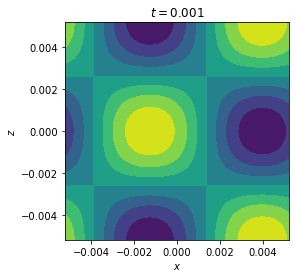

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))

ax.set_title('$t={:.3f}$'.format(data['Time']))
ax.set_xlabel('$x$')
ax.set_ylabel('$z$')
ax.contourf(data['x1v'], data['x2v'], data['rho'][0,:,:])

### $t = 0.2$ Using `ax.pcolormesh`

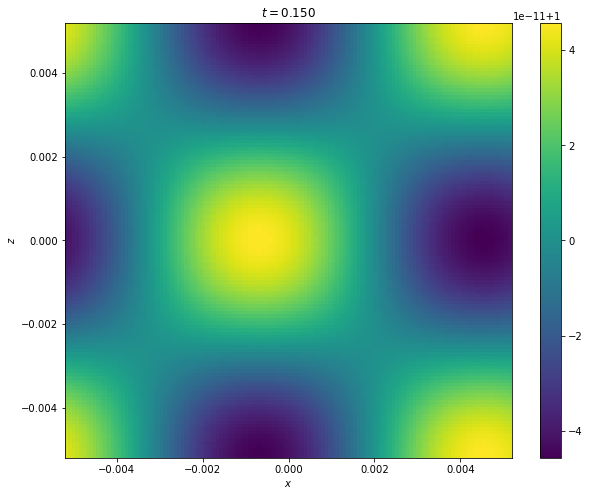

In [6]:
data = athena_read.athdf('athdf/SI.out1.00150.athdf')

fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('$t={:.3f}$'.format(data['Time']))
ax.set_xlabel('$x$')
ax.set_ylabel('$z$')
img = ax.pcolormesh(data['x1v'], data['x2v'], data['rho'][0,:,:])
plt.colorbar(img, ax=ax)

## Snapshot Series

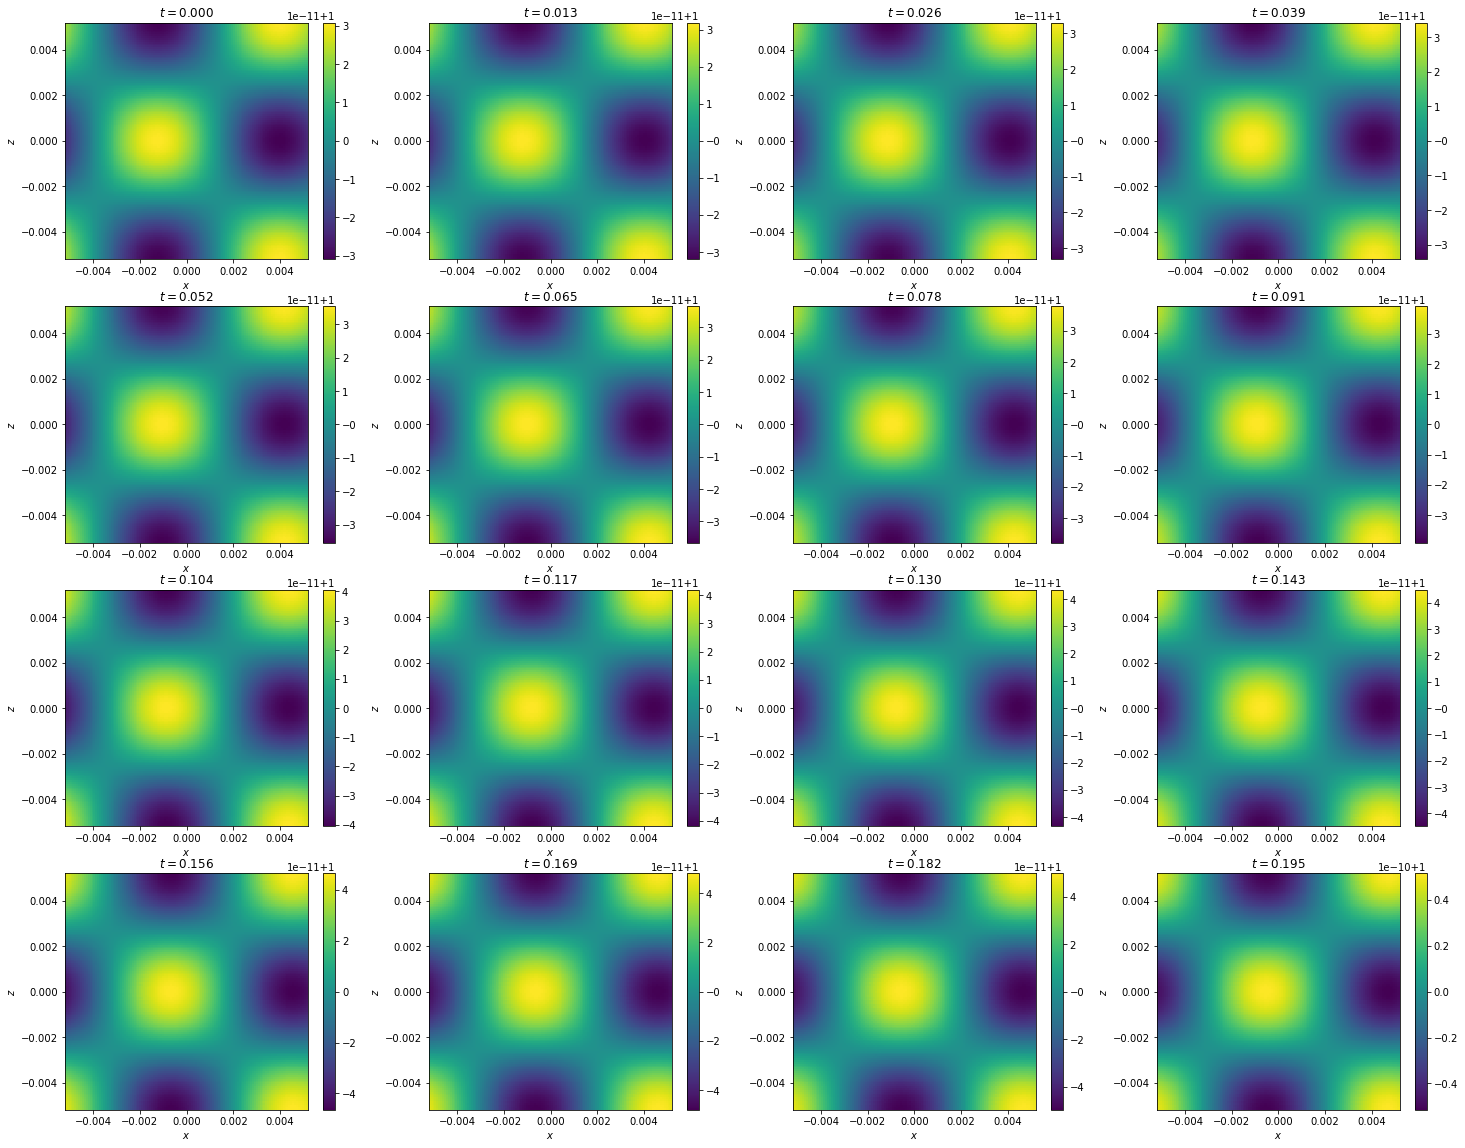

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(25,20))

for i,ax in enumerate(axs.flat):
    fname = 'athdf/SI.out1.' + str(i*13).zfill(5) + '.athdf'
    data = athena_read.athdf(fname)
    ax.set_title('$t={:.3f}$'.format(data['Time']))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$z$')
    img = ax.pcolormesh(data['x1v'], data['x2v'], data['rho'][0,:,:])
    plt.colorbar(img, ax=ax)

## Growth Rates

### Max./Min. Densities (`rho` & `rhop`)

In [8]:
# linA
epsilon = 3.0 # average density ratio of particles to gas in background state

# retrieve max densities across outputs
times = np.zeros(201)
rhomax = np.zeros(201)
rhomin = np.zeros(201)
rhopmax = np.zeros(201)
rhopmin = np.zeros(201)

for i in range(201):
    fname = 'athdf/SI.out1.' + str(i).zfill(5) + '.athdf'
    data = athena_read.athdf(fname)
    times[i] = data['Time']
    rhomax[i] = np.amax(data['rho']) - 1
    rhomin[i] = 1 - np.amin(data['rho'])
    rhopmax[i] = np.amax(data['rhop']) - epsilon # difference w/ epsilon
    rhopmin[i] = epsilon - np.amin(data['rhop'])

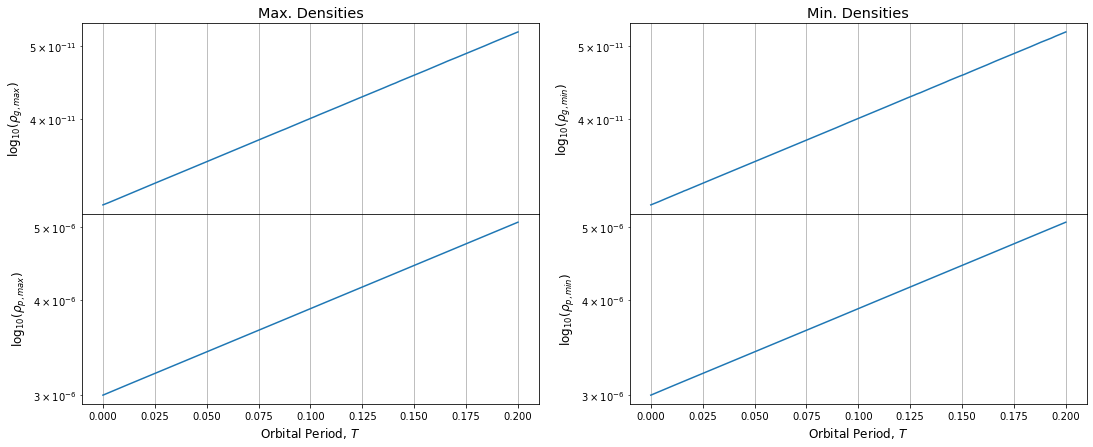

In [9]:
# plot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, sharex='col', figsize=(18,7),
                        gridspec_kw={'hspace': 0})

# upper-left subplot
axs[0,0].set_title(r'Max. Densities', size='x-large')
axs[0,0].set_ylabel(r'$\log_{10}(\rho_{g,max})$', size='large')
axs[0,0].semilogy(times, rhomax)
# lower-left subplot
axs[1,0].set_ylabel(r'$\log_{10}(\rho_{p,max})$', size='large')
axs[1,0].set_xlabel('Orbital Period, $T$', size='large')
axs[1,0].semilogy(times, rhopmax)
# upper-right subplot
axs[0,1].set_title(r'Min. Densities', size='x-large')
axs[0,1].set_ylabel(r'$\log_{10}(\rho_{g,min})$', size='large')
axs[0,1].semilogy(times, rhomin)
# lower-left subplot
axs[1,1].set_ylabel(r'$\log_{10}(\rho_{p,min})$', size='large')
axs[1,1].set_xlabel('Orbital Period, $T$', size='large')
axs[1,1].semilogy(times, rhopmin)

for i,ax in enumerate(axs.flat):
    ax.grid()

In [10]:
from scipy.stats import linregress
fit1 = linregress(times, rhomax)

ModuleNotFoundError: No module named 'scipy'

In [11]:
Omega = 2*np.pi
s = (np.log(rhomax[-1]) - np.log(rhomax[0]))/(times[-1] - times[0])
print('s = ', s/Omega, " Ω")

s =  0.41810870504272374  Ω


## Tasks
- Answers in Eq. 10 in YJ07
- CC's probgen & input come from Eqs. 1-4
- [ ] __Growth rates__: semilog plot of max. density vs. $t$
    - [x] Difference of max. density w/ initial (not absolute)
    - [x] Plot minimum density as well (should be symmetrical)
    - [x] Particles: see $\epsilon$ def'n (YJ07)
    - [ ] slope is $s$ (growth rate): pick two points to measure
    - [ ] make sure my $s$ is right units
    - [ ] Compare w/ Lin A in YJ07 (Fig. 4 @ various res.): should be one dot, but check input for #grid pts/$\lambda$
- [ ]  Understand units in input file
    - [x] Understand diff. between orbital period and $1/\Omega$ (see "Time" subsection below)
    - [ ] Understand 3 main: time, length, mass ($\rho$); i.e., what's the "code units", e.g., 1 in time, or 1 in length
    - [ ] ID sim. invariants
- [ ] Check all 8 components, e.g., velocities
    - [ ] Understand the 8 different components of the system
    - [ ] Code solves paper's eqs. w/o units

## Units

### Time
```
<time>
...
tlim       = 0.2	# time limit
```
The _angular frequency_ $\Omega$ (dimensions $\text{[time]}^{-1}$) of an orbiting object is 

$$
\Omega = \frac{2\pi}{T},
$$

where the _orbital period_ $T$ (dimensions $\text{[time]}$; units: $\text{yr, s}$) is the completion time for one orbit. For a Keplerian orbit at $r = 1\text{ AU}$, $T = 1\text{ yr}$, and thus

$$
\Omega = 2\pi\text{ yr}^{-1},
$$

and $1/\Omega = 1/(2\pi)\text{ yr} \approx 0.16\text{ yr}$.

### Length
$r = 1\rm{ AU}$?

In [12]:
# from `athinput.si`
# <mesh>
nx1    = 128	                    # Number of zones in X1-direction (x or radial)
x1min  = -0.00523598775598298873	# minimum value of X1
x1max  =  0.00523598775598298873	# maximum value of X1

In [13]:
l_x = x1max - x1min
Deltax = l_x/nx1

display(Latex(f'$\\lambda_x = {l_x}\\text{{ AU}}$'))
display(Latex(f'$\\Delta x = {Deltax}\\text{{ AU}}$'))
display(Latex(f'$\\lambda_x/\\Delta x = {l_x/Deltax}$'))

NameError: name 'Latex' is not defined

In [14]:
c_s = 2pi [L/T]
    = 2pi [L/orbital period]
L = T*c_s/2pi
  = (2pi/Omega)*c_s/2pi
L = c_s/Omega [= disk scale height] #**derive this from first principles (see Phil Armitage's Planet formation lecture notes on ADS)

Omega = 2pi [/T]
T = 2pi/Omega [= orbital period]

SyntaxError: invalid syntax (<ipython-input-14-6cff4be03e0f>, line 1)

### Mass
```
<particles>
...
taus0 = 0.0159154943091895336	# drag stopping time (in code time unit)
```

## Table 1: Test Mode Eigensystems (YJ07)

### Velocities
> "Notes.—... velocities are normalized to $\eta v_\rm{K}$... with $\eta v_\rm{K}/c_s = 0.05$." (YJ07, Table 1, p. 617)

If $c_s = 2\pi$, then 
$$
\eta v_\rm{K} = \frac{\pi}{10} \approx 0.314.
$$

If $\tilde{u}$ or $\tilde{w}$ are normalized to $\eta v_\rm{K}$, then the _unnormalized_ velocities $d\tilde{u}$ and $d\tilde{w}$ would be

\begin{align}
d\tilde{u} &= \eta v_\text{K}\tilde{u} \\
\tilde{u} &= \frac{d\tilde{u}}{\eta v_\text{K}}
\end{align}

In [ ]:
# from `athinput.si`
# <hydro>
iso_sound_speed = 6.28318530717958648	# isothermal sound speed (2π)
#...
# <problem>
# ...
duy0 = 0.05 # reduction in radial gas velocity in terms of the speed of sound
# ...
dux_re   = -0.0563787907	# Real part of the x-component in gas velocity perturbation
dux_im   = +0.0120535455	# Imaginary part of the x-component in gas velocity perturbation
duy_re   = +0.0445570113	# Real part of the y-component in gas velocity perturbation
duy_im   = +0.0197224299	# Imaginary part of the y-component in gas velocity perturbation
duz_re   = +0.0563784989	# Real part of the z-component in gas velocity perturbation
duz_im   = -0.0120536242	# Imaginary part of the z-component in gas velocity perturbation
dvpx_re  = -0.0466198076	# Real part of the x-component in particle velocity perturbation
dvpx_im  = +0.0124333223	# Imaginary part of the x-component in particle velocity perturbation
dvpy_re  = +0.0435211557	# Real part of the y-component in particle velocity perturbation
dvpy_im  = +0.0213517453	# Imaginary part of the y-component in particle velocity perturbation
dvpz_re  = +0.0546507401	# Real part of the z-component in particle velocity perturbation
dvpz_im  = -0.0077776652	# Imaginary part of the z-component in particle velocity 

In [ ]:
from IPython.display import Latex

# compare w/ Table 1, LinA (YJ07), p. 617
# etav_K = np.pi/10
etav_K = duy0*iso_sound_speed

display(Latex(f'$\\tilde{{u}}_x = {(dux_re + dux_im*1j)/etav_K}$'))
display(Latex(f'$\\tilde{{u}}_y = {(duy_re + duy_im*1j)/etav_K}$'))
display(Latex(f'$\\tilde{{u}}_z = {(duz_re + duz_im*1j)/etav_K}$'))
display(Latex(f'$\\tilde{{w}}_x = {(dvpx_re + dvpx_im*1j)/etav_K}$'))
display(Latex(f'$\\tilde{{w}}_y = {(dvpy_re + dvpy_im*1j)/etav_K}$'))
display(Latex(f'$\\tilde{{w}}_z = {(dvpz_re + dvpz_im*1j)/etav_K}$'))

- Why do these differ slightly from Table 1?
- CC used normalization constants from different paper
- Ratios between u_x/u_y, u_y/u_z, etc., should be the same between CC's input file and YJ07
- YJ07: Use $c_s = \Omega = 1$
- CC uses $c_s = \Omega = 2\pi$ so that length unit = 1 easy to convert, and disk scale height = 1

### Densities
"Notes.—... densities [normalized] to the average value for particles or gas, respectively... We used $\tilde{\rho}_p = 10^{-6}$ to normalize the eigenvector." (YJ07, Table 1, p. 617)

From Eq. (6), the density ratio of particles to gas is
\begin{align}
\epsilon &\equiv \rho_p/\rho_g \\
\implies \tilde{\rho_g} &= \tilde{\rho_p}/\epsilon
\end{align}

In [ ]:
# from `athinput.si`
# <problem>
# ...
epsilon = 3.0	            # dust-to-gas density ratio
# ...
drhog_re = +0.0000074637	# Real part of the gas density perturbation
drhog_im = +0.0000070677	# Imaginary part of the gas density perturbation

In [ ]:
# compare w/ Table 1, LinA (YJ07), p. 617
rho_p = 1e-6

display(Latex(f'$\\tilde{{\\rho}}_g = {(drhog_re + drhog_im*1j)/epsilon}$'))

- Should be e-5, not e-6.
- Where does $\tilde{\rho}_p = 10^{-6}$ come into play?